# Определение перспективного тарифа для телеком компании
## Цель: Определить выгодный тарифный план для корректировки рекламного бюджета.

Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Выборка. Данные 500 пользователей тарифных планов «Смарт» и «Ультра»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Примечание: «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт:

Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
## Описание тарифов
### Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей
### Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

## **Изучение данных из файла**

Открытие файла с данными и изучение общей информации

In [1]:
# Необходимые библиотеки для исследования 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
from scipy import stats as st
import seaborn as sns
from IPython.display import display

## **Обзор данных**

In [2]:
# Загрузка файлов

df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
# Получение общей информации датасета df_calls
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
# проверим количество дубликатов в датасете df_calls, кол-во дубликатов равно 0.
df_calls.duplicated().sum()

0

*При анализе датасета df_calls выявлено: всего 202 607 строк, 4 столбца, пропусков нет, дубликатов нет*

In [6]:
# Получение общей информации датасета df_internet
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
# проверим количество дубликатов в датасете df_internet, кол-во дубликатов равно 0.
df_internet.duplicated().sum()

0

*При анализе датасета df_internet выявлено: всего 149 396 строк, 5 столбцов, пропусков нет, дубликатов нет*

In [9]:
# Получение общей информации датасета df_messages
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
# проверим количество дубликатов в датасете df_messages, кол-во дубликатов равно 0.
df_messages.duplicated().sum()

0

**При анализе датасета df_messages выявлено: всего 123 036 строк, 3 столбца, пропусков нет, дубликатов нет**

In [12]:
# Получение общей информации датасета df_tariffs
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
# проверим количество дубликатов в датасете df_tariffs, кол-во дубликатов равно 0.
df_tariffs.duplicated().sum()

0

**При анализе датасета df_tariffs выявлено: всего 2 строки, 8 столбцов, пропусков нет, дубликатов нет**

In [15]:
# Получение общей информации датасета df_users
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64


<AxesSubplot:>

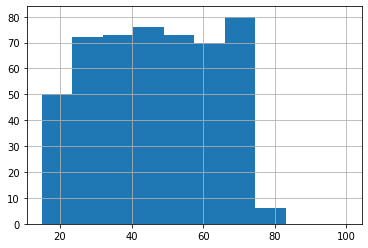

In [16]:
print(df_users['age'].describe())
df_users['age'].hist(bins=10, range= (15, 100))

<div class="alert alert-block alert-info">
Максимальное количество лет- 75, минимальное - 18, по результатам построенной гистограммы в столбце 'age' ошибочных данных не выявлено.
</div>

In [17]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
# проверим количество дубликатов в датасете df_users, кол-во дубликатов равно 0.
df_users.duplicated().sum()

0

**При анализе датасета df_users выявлено: всего 500 строк, 8 столбцов, пропуски в столбце churn_date (дата прекращения пользования тарифом) в количестве 462 шт., дубликатов нет. Пропуски в столбце churn_date означают, что тариф ещё действовал на момент выгрузки данных, заполнять пропуски не нужно**

### Выводы:

При анализе таблиц выявлено:
- Значения даты в датасетах с данными о звонках, сообщениях и интернета имеют тип object, эти данные лучше преобразовать в тип datetime64.
- Также необходимо округлить длительность звонков и изменить тип данных на целочисленный.

### Поработаем с каждой таблицей для приведения в нужный вид

### Звонки

In [19]:
# Перевод даты из объектного типа в тип datetime64
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# Добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12
df_calls['month_num'] = pd.DatetimeIndex(df_calls['call_date']).month

# Добавляем столбец с началом календарного месяца
df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')

# Округляем длительность звонков и меняем тип данных на целочисленный
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [20]:
df_calls.head()

,id,call_date,duration,user_id,month_num,month
0,1000_0,2018-07-25,0,1000,7,2018-07-01
1,1000_1,2018-08-17,0,1000,8,2018-08-01
2,1000_2,2018-06-11,3,1000,6,2018-06-01
3,1000_3,2018-09-21,14,1000,9,2018-09-01
4,1000_4,2018-12-15,6,1000,12,2018-12-01


In [21]:
# Рассмотрим данные для столбца 'duration' (длительность звонка)
print(df_calls['duration'].describe())

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64


<AxesSubplot:>

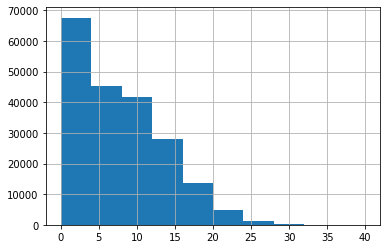

In [22]:
df_calls['duration'].hist(bins=10, range= (0, 40))

### Сообщения

In [23]:
# Перевод даты из объектного типа в тип datetime64
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'] , format='%Y-%m-%d')

# Добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12
df_messages['month_num'] = pd.DatetimeIndex(df_messages['message_date']).month

# Добавляем столбец с началом календарного месяца
df_messages['month'] = df_messages['message_date'].astype('datetime64[M]')

In [24]:
df_messages.head()

,id,message_date,user_id,month_num,month
0,1000_0,2018-06-27,1000,6,2018-06-01
1,1000_1,2018-10-08,1000,10,2018-10-01
2,1000_2,2018-08-04,1000,8,2018-08-01
3,1000_3,2018-06-16,1000,6,2018-06-01
4,1000_4,2018-12-05,1000,12,2018-12-01


In [25]:
print(df_messages['month_num'].describe())

count    123036.000000
mean          8.632262
std           2.747328
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          12.000000
Name: month_num, dtype: float64


<AxesSubplot:>

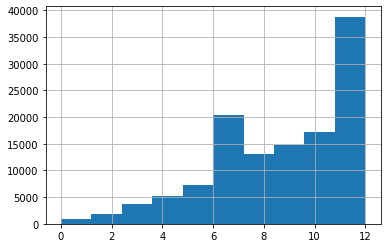

In [26]:
df_messages['month_num'].hist(bins=10, range= (0, 12))

### Интернет траффик

In [27]:
# Перевод даты из объектного типа в тип datetime64
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'] , format='%Y-%m-%d')

# Добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12
df_internet['month_num'] = pd.DatetimeIndex(df_internet['session_date']).month

# Добавляем столбец с началом календарного месяца
df_internet['month'] = df_internet['session_date'].astype('datetime64[M]')

In [28]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month_num,month
0,0,1000_0,112.95,2018-11-25,1000,11,2018-11-01
1,1,1000_1,1052.81,2018-09-07,1000,9,2018-09-01
2,2,1000_2,1197.26,2018-06-25,1000,6,2018-06-01
3,3,1000_3,550.27,2018-08-22,1000,8,2018-08-01
4,4,1000_4,302.56,2018-09-24,1000,9,2018-09-01


In [29]:
print(df_internet['mb_used'].describe())

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64


<AxesSubplot:>

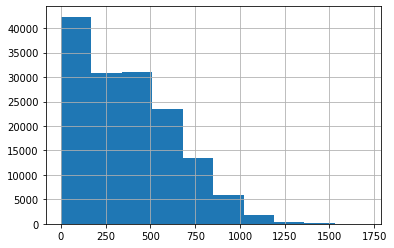

In [30]:
df_internet['mb_used'].hist(bins=10, range= (0, 1700))

## Расчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [31]:
# Расчет количества сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя
calls = df_calls.groupby(['user_id','month']).agg(calls_duration = pd.NamedAgg(column = 'duration', aggfunc = 'sum'), calls_number = ('id', 'count')).reset_index()
calls.head(5)

,user_id,month,calls_duration,calls_number
0,1000,2018-05-01,159,22
1,1000,2018-06-01,172,43
2,1000,2018-07-01,340,47
3,1000,2018-08-01,408,52
4,1000,2018-09-01,466,58


In [32]:
# Расчет количества отправленных сообщений по месяцам для каждого пользователя
msgs = df_messages.groupby(['user_id','month']).agg(msgs_number = pd.NamedAgg(column = 'id', aggfunc = 'count')).reset_index()
msgs.head(5)

,user_id,month,msgs_number
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


In [33]:
# Расчет объема израсходованного интернет-трафика по месяцам для каждого пользователя
#internet = df_internet.groupby(['user_id','month']).agg(mb_used = pd.NamedAgg(column = 'mb_used', aggfunc = 'sum')).reset_index()
#internet.head(5)

In [34]:
# Расчет объема израсходованного интернет-трафика по месяцам для каждого пользователя по комментариям ревьюера
internet = df_internet.groupby(['user_id','month']).agg(mb_used = ('mb_used', 'sum')).reset_index()
internet.head(5)

,user_id,month,mb_used
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91


### Объединение данных из таблиц

In [35]:
# Объединим данные таблиц calls и msgs в одну таблицу
data = calls.merge(msgs, how='outer', on=['user_id', 'month'])

In [36]:
# Добавим к сводной таблице данные из таблицы internet
data = data.merge(internet, how='outer', on=['user_id', 'month'])

In [37]:
# Добавим к сводной таблице данные из таблицы df_users
data = data.merge(df_users, how='outer', on=['user_id'])

In [38]:
# С целью добавления к сводной таблице данных из таблицы df_tariffs по столбцу tariff, переименуем столбец tariff_name таблицы
# df_tariffs на tariff.
df_tariffs.rename(columns = {'tariff_name' : 'tariff'}, inplace = True)
# df_tariffs

In [39]:
# Добавим к сводной таблице данные из таблицы df_tariffs
data = data.merge(df_tariffs, how='outer', on=['tariff'])

In [40]:
data.head()

,user_id,month,calls_duration,calls_number,msgs_number,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [41]:
data[data['calls_duration'].isnull()].head()

,user_id,month,calls_duration,calls_number,msgs_number,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
934,1476,2018-04-01,NaN,NaN,NaN,530.78,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
952,1091,2018-05-01,NaN,NaN,30.0,10703.37,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
953,1091,2018-06-01,NaN,NaN,30.0,10236.19,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
954,1091,2018-07-01,NaN,NaN,35.0,16444.98,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
955,1091,2018-08-01,NaN,NaN,31.0,12633.88,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1


In [42]:
data['calls_duration'] = data['calls_duration'].replace(np.NaN, 0)
data['calls_number'] = data['calls_number'].replace(np.NaN, 0)
data['msgs_number'] = data['msgs_number'].replace(np.NaN, 0)
data['mb_used'] = data['mb_used'].replace(np.NaN, 0)

In [43]:
# В таблицу попали два клиента, которые не пользовались услугами тарифов
data[data['month'].isnull()]

,user_id,month,calls_duration,calls_number,msgs_number,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaT,0.0,0.0,0.0,0.0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaT,0.0,0.0,0.0,0.0,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


In [44]:
# удалим строки с данными клиентами.
data.loc[data['user_id'] == 1128,'user_id'] = None
data.loc[data['user_id'] == 1371,'user_id'] = None
data = data.dropna(subset=['user_id'])
# data[data['month'].isnull()]

In [45]:
# data[data['msgs_number'].isnull()].head()

###  Расчитаем помесячную выручку с каждого пользователя

In [46]:
# Расчитаем помесячную выручку с каждого пользователя с помощью функции
def calculate_revenue(pay):
    tariff_fee = pay['rub_monthly_fee']
    if (pay['calls_duration'] > pay['minutes_included']):
        tariff_fee += (pay['calls_duration'] - pay['minutes_included']) * pay['rub_per_minute']  
    if(pay['msgs_number'] > pay['messages_included']):
        tariff_fee += (pay['msgs_number'] - pay['messages_included']) * pay['rub_per_message']   
    if (pay['mb_used'] /1024 > pay['mb_per_month_included'] / 1024):
        tariff_fee += np.ceil(pay['mb_used']/1024 - pay['mb_per_month_included'] / 1024) * pay['rub_per_gb']
    return (tariff_fee)
# в датасете data создадим столбец monthly_revenue с данными о месячной выручке каждого пользователя
data['monthly_revenue'] = data.apply(calculate_revenue, axis=1)

In [47]:
data.head()

,user_id,month,calls_duration,calls_number,msgs_number,mb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000.0,2018-05-01,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000.0,2018-06-01,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000.0,2018-07-01,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000.0,2018-08-01,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000.0,2018-09-01,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


### Выводы: 
- В данном пункте рассчитали для каждого пользователя данные о количестве сделанных звонков и израсходованных минут, отправленных сообщений, объем израсходованного интернет-трафика по месяцам.
- Кроме того, объединили все используемые таблицы в одну сводную и добавили столбец с помесячной выручкой с каждого пользователя в зависимости от выбранного тарифа.

## **Анализ данных**

Задание:
- Опишите поведение клиентов оператора, исходя из выборки. 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. 
- Опишите распределения.

In [48]:
# Проведем анализ данных
data.describe()
# data[data['tariff'] == 'ultra'].mean()
# data[data['tariff'] == 'smart'].mean()


,user_id,calls_duration,calls_number,msgs_number,mb_used,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,451.244866,63.038892,38.281269,17207.612859,46.641568,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057,1529.076229
std,144.659172,241.909978,33.236368,36.148326,7570.958771,16.586109,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199,798.251091
min,1000.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,550.000000
25%,1125.000000,282.000000,40.000000,9.000000,12491.890000,32.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,750.000000
50%,1253.000000,443.000000,62.000000,30.000000,16943.175000,46.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,1653.500000
75%,1378.750000,589.000000,82.000000,57.000000,21424.625000,62.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,1950.000000
max,1499.000000,1673.000000,244.000000,224.000000,49745.690000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,6770.000000


<AxesSubplot:>

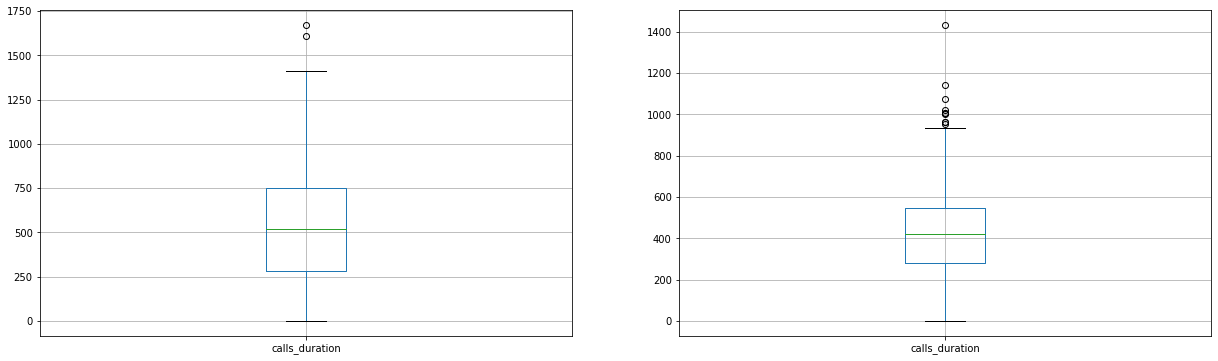

In [49]:
# Проведем сравнение тарифов ULTRA И SMART по минутам разговора
fig = plt.figure(figsize = (21,6))
data[data['tariff'] == 'ultra'].boxplot('calls_duration', ax = plt.subplot(1,2,1))
data[data['tariff'] == 'smart'].boxplot('calls_duration', ax = plt.subplot(1,2,2))

- Пользователи тарифа Смарт (среднее 419 мин) в месяц тратят меньше минут разговора, чем пользователи тарифа Ультра (среднее 545 мин).
- На тарифе Смарт пользователи часто не укладываются в лимиты и доплачивают за звонки.

Также для сравнения тарифов построим гистограммы для столбцов с данными о количестве звонков, израсходованных минут, отправленных сообщений и объема израсходованного интернет-трафика по месяцам.

In [50]:
def hist_maker_and_table(df, name,x_1_smart,x_2_ultra):
    cd = df.groupby(df.tariff)[name]
    cd_desc = cd.describe(percentiles = [.01,.25,.75,.99])
    cd_desc['var']= [np.var(cd.get_group('smart'), ddof=1), np.var(cd.get_group('ultra'), ddof=1)]
    display(cd_desc)
    smart = df.query('tariff == "smart"')[name]
    ultra = df.query('tariff == "ultra"')[name]
    plt.figure(figsize=(10,6))
    plt.hist(smart, bins=50, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
    plt.hist(ultra, bins=50, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.0,417.934948,190.313730,0.0,15.28,282.0,422.0,545.0,872.72,1435.0,36219.315784
ultra,985.0,526.623350,317.606098,0.0,0.00,284.0,518.0,752.0,1291.12,1673.0,100873.633397


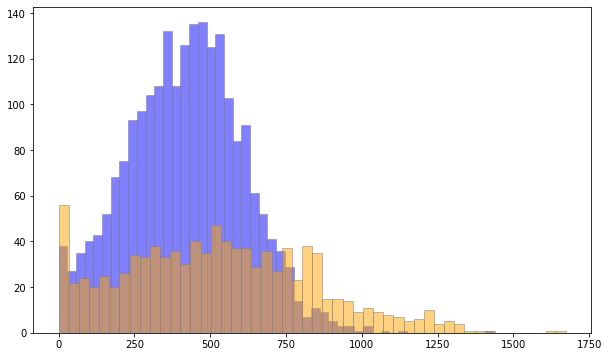

In [51]:
# Построим гистограмму для данных о длительности звонков
hist_maker_and_table(data,'calls_duration',500,3000)

Из данных гистограммы можно сделать выводы:
- Среднее количество минут на тарифе Ультра (545) больше чем на тарифе Смарт (419). 
- Также величины стандартного отклонения и дисперсии на тарифе Ультра (307 и 94203) больше чем на тарифе Смарт (189 и 35844) соответственно.
- Пользователи тарифа Ультра всегда укладываются в установленные лимиты. Максимальное число минут разговора в месяц значительно меньше заложенных в него 3000. 
- На тарифе Смарт пользователи часто не укладываются в лимиты (500) и доплачивают за звонки.

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.0,58.463437,25.939858,0.0,2.0,40.0,60.0,76.0,120.72,198.0,672.876243
ultra,985.0,73.392893,43.916853,0.0,0.0,41.0,74.0,104.0,182.16,244.0,1928.689990


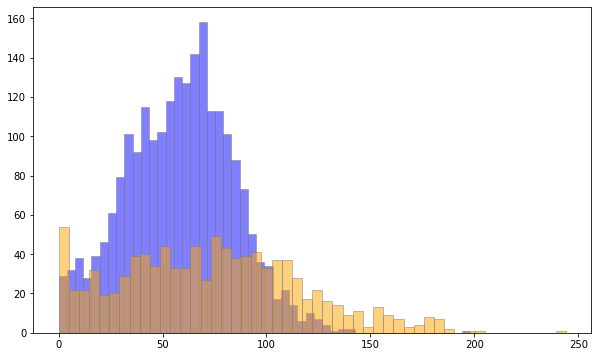

In [52]:
# Построим гистограмму для данных о количестве звонков
hist_maker_and_table(data,'calls_number',50,300)

Из данных гистограммы можно сделать выводы:
- Среднее количество звонков на тарифе Ультра (76) больше чем на тарифе Смарт (58). 
- Также величины стандартного отклонения и дисперсии на тарифе Ультра (42 и 1798) больше чем на тарифе Смарт (25,8 и 665) соответственно.

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.0,33.384029,28.227876,0.0,0.0,10.0,28.0,51.0,108.00,143.0,796.812958
ultra,985.0,49.363452,47.804457,0.0,0.0,6.0,38.0,79.0,183.32,224.0,2285.266143


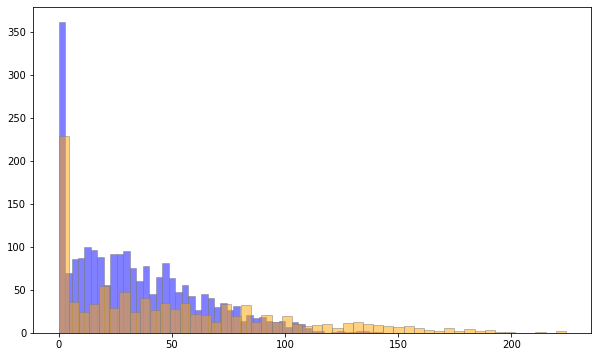

In [53]:
# Построим гистограмму для данных о количестве сообщений
hist_maker_and_table(data,'msgs_number',50,300)

Из данных гистограммы можно сделать выводы:
- Среднее количество сообщений на тарифе Ультра (61) больше чем на тарифе Смарт (39). 
- Также величины стандартного отклонения и дисперсии на тарифе Ультра (46 и 2110) больше чем на тарифе Смарт (27 и 717) соответственно.
- Пользователи тарифа Ультра всегда укладываются в установленные лимиты. Максимальное число сообщений в месяц значительно меньше заложенных в него 1000.
- На тарифе Смарт пользователи часто не укладываются в лимиты (50) и доплачивают за сообщения сверх тарифного плана.

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.0,16208.386990,5870.476681,0.0,1496.0384,12643.01,16506.84,20042.93,29693.6956,38552.45,3.446250e+07
ultra,985.0,19468.805208,10087.170752,0.0,0.0000,11770.26,19308.01,26837.69,43005.9644,49745.69,1.017510e+08


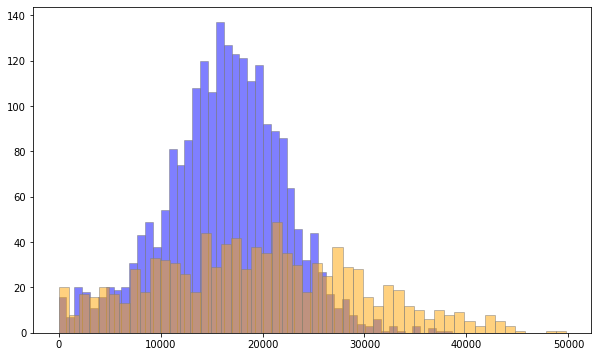

In [54]:
# Построим гистограмму для данных о количестве интернет-траффика
hist_maker_and_table(data,'mb_used',50,300)

Из данных гистограммы можно сделать выводы:
- Среднее количество интернет-траффика на тарифе Ультра (19668) больше чем на тарифе Смарт (16215).
- Также величины стандартного отклонения и дисперсии на тарифе Ультра (9943) больше чем на тарифе Смарт (5862) соответственно.
- Пользователи тарифа Ультра не всегда укладываются в установленные лимиты. Максимальное число интернет-траффика (50Гб) в месяц больше заложенных в него 30Гб.
- На тарифе Смарт пользователи очень часто не укладываются в лимиты (30Гб) и доплачивают за сообщения сверх тарифного плана.

### Выводы:
- Пользователи тарифа Смарт в среднем в месяц тратят меньше минут разговора, чем пользователи тарифа Ультра.
- На тарифе Смарт пользователи очень часто не укладываются в лимиты и доплачивают за превышения лимита по звонкам, сообщениям и интернет-траффиком.
- Дисперсия и стандартное отклонение всегда выше на тарифе Ультра, но пользователи этого тарифа укладываются в установленные лимиты. 
- Максимальное число минут разговора, сообщений в месяц значительно меньше заложенных в тариф Ультра.
- Пользователи тарифа Ультра не всегда укладываются в установленные лимиты интернет-траффика. Максимальное число интернет-траффика (50Гб) в месяц больше заложенных в него 30Гб.

In [55]:
# код ревьюера
data.pivot_table(index = 'tariff', values = ['calls_duration', 'mb_used', 'msgs_number'],
                            aggfunc = ['var', 'std', 'mean'])

var                                       std                \
       calls_duration       mb_used  msgs_number calls_duration       mb_used   
tariff                                                                          
smart    36219.315784  3.446250e+07   796.812958     190.313730   5870.476681   
ultra   100873.633397  1.017510e+08  2285.266143     317.606098  10087.170752   

                             mean                            
       msgs_number calls_duration       mb_used msgs_number  
tariff                                                       
smart    28.227876     417.934948  16208.386990   33.384029  
ultra    47.804457     526.623350  19468.805208   49.363452

## Проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


### Гипотеза 1:
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
- Нулевая гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны, т.е. средние значения равны.

- Альтернативная гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, т.е. средние значения не равны.

Дисперсии выборок отличаются более чем на 5%.

In [56]:
sample_1 = data[data['tariff'] == 'ultra']['monthly_revenue'] 
sample_2 = data[data['tariff'] == 'smart']['monthly_revenue'] 

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind( sample_1, sample_2)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  1.4229814360764067e-160
Принимаем альтернативную гипотезу


### Вывод: p-значение:  1.0331049116258098e-192
Принимаем альтернативную гипотезу, p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов.

### Гипотеза 2:
Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

- Нулевая гипотеза: Средняя выручка пользователей из Москвы и других регионов равны, т.е. средние значения равны.

- Альтернативная гипотеза: Средняя выручка пользователей из Москвы и других регионов не равны, т.е. средние значения не равны.

Дисперсии выборок отличаются более чем на 5%

In [57]:
# data['city'].unique()
# data[data['city'] == 'Москва'].count()
# data[data['city'] != 'Москва'].count(

In [58]:
sample_1 = data[data['city'] == 'Москва']['monthly_revenue'] 
sample_2 = data[data['city'] != 'Москва']['monthly_revenue'] 
results = st.ttest_ind( sample_1, sample_2)

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.5440152911670224
Опровергнуть нулевую гипотезу нельзя


### Вывод: p-значение:  0.4667239724061705
Принимаем нулевую гипотезу, p-значение больше значения alpha, что дает основание принять предположение об отсутствии различий между средними выручками у пользователей из Москвы и других регионов.

# Итоговый вывод

### В ходе выполнения данного проекта:
* Проведен анализ предложенных тарифов Смарт и Ультра на небольшой выборке клиентов, выявлены недостатки в данных, данные были преобразованы в необходимые типы, изменены на целочисленный тип.
* Выполнен для каждого пользователя расчет данных о количестве сделанных звонков, израсходованных минут, отправленных сообщений и объема интернет-трафика по месяцам.
* Все используемые таблицы объединены в одну сводную и добавлен столбец с помесячной выручкой каждого пользователя в зависимости от выбранного тарифа.
### Проведено сравнение тарифов Смарт и Ультра по некоторым параметрам, получены следующие результаты:
* Пользователи тарифа Смарт в среднем в месяц тратят меньше минут разговора, сообщений и интернет-траффика, чем пользователи тарифа Ультра.
* На тарифе Смарт пользователи очень часто не укладываются в лимиты и доплачивают за превышения лимита по звонкам, сообщениям и интернет-траффиком.
* Дисперсия и стандартное отклонение всегда выше на тарифе Ультра, но пользователи этого тарифа укладываются в установленные лимиты. 
* Максимальное число минут разговора и сообщений пользователей тарифа Ультра в месяц значительно меньше заложенных в тариф.
* Пользователи тарифа Ультра не всегда укладываются в установленные лимиты интернет-траффика. Максимальное число интернет-траффика (50Гб) в месяц больше заложенных в него 30Гб.
### Проведена проверка двух гипотез:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
  - **Результаты проверки гипотез:**
- Первая гипотеза: Принимаем альтернативную гипотезу.
- Вторая гипотеза: Принимаем нулевую гипотезу.
